# Computer Visions
* Object Classification
* Object Detection

`Architecture of CNN (Multiclass Image Classficaiton Problems)`

## Computer Vision Input and Outputs

`Multiclassficaiton Problem Images`

input => (W,H,C) => Tensors Pytorch (Numerical Encoding)=> ML Algo => Output => Predictions (Probabilities)

`[batch_size, width, height, channels]` => `[None, 224, 224, 3] Or [32, 224, 224, 3]`
`Output Shape (k,1)` => `[0.80,0.1,0.1]`

* NHWC => Colour Channels Last
* NCHW => Colour Channels first


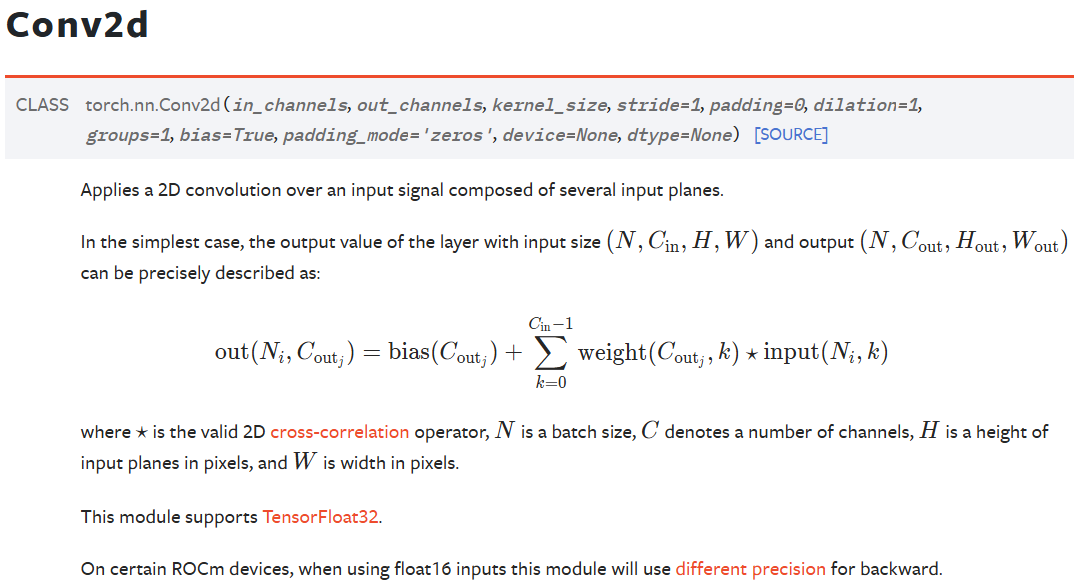

In [144]:
# pytorch
import torch
from torch import nn

# torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # convert pil image or numpy.ndarray to tensors

# matplotlib
import matplotlib.pyplot as plt

In [145]:
print(torch.__version__)
print(torchvision.__version__)


2.5.1+cpu
0.20.1+cpu


# 1) Getting Datasets

* Fashion MNIST (Clothing datasets)

`1) Download Datasets (with transforms)`

`2) Visulaize Datasets (image or tensors)`

`1) Prepare Datasets (Data Loader)`

`1) Download Datasets`


### 1) Downlaod datsets

In [146]:
# setup tartining data
from torchvision import datasets

train_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor(), target_transform=None)

test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor(), target_transform=None)

In [147]:
len(train_data), len(test_data)

(60000, 10000)

In [148]:
# first training example
image, label = train_data[1]
# image, label
print(label)

0


In [149]:
class_names = train_data.classes


In [150]:
class_to_idx = train_data.class_to_idx
print(class_to_idx, class_names)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9} ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [151]:
# to get all the tragers
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [152]:
image.shape
# label.size  #no shape for this just a number

torch.Size([1, 28, 28])

In [153]:
print(f"Image Shape : {image.shape} => target : {class_names[label]}")


Image Shape : torch.Size([1, 28, 28]) => target : T-shirt/top


### 2) Visualize the datasets

In [154]:
torchvision.transforms.functional.to_pil_image(image)
# comvert tensors to pil image (Python Imaging Library)

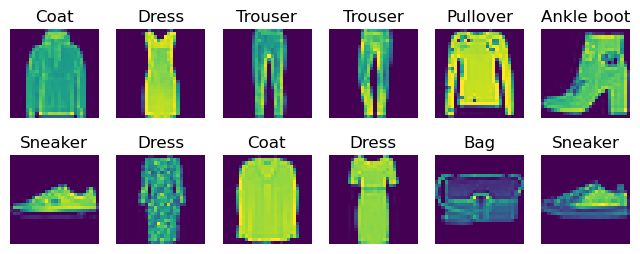

In [155]:
# Create a figure with 10 subplots in a single row
fig = plt.figure(figsize=(8,3))
rows, cols = 2, 6
for i in range(1, rows * cols + 1):
    random_indx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_indx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze())
    plt.title(class_names[label])
    plt.axis(False)


### 3) Prepare the datsest (dataloader) and visualize one image out of batch size

* Right now our datasets in the form of pytorch datsets. `DataLoader` converts our datsets into python iterables 
* More specifically we want to turn our data into mini-batches (why ?)
    * to make computationally efficient (32 or 64 images at a time)
    * it gives our neural networks to more chaces to update its gradient per epoch


In [156]:
print(train_data, test_data, sep="\n", end="\n")

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [157]:
no_of_batches = len(train_data) / 32
no_of_batches

1875.0

In [158]:
from torch.utils.data import DataLoader

# setup batchsizxe hyper parametrs
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x245bf9533b0>,
 <torch.utils.data.dataloader.DataLoader at 0x245bf91e6c0>)

In [159]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [160]:
# check out whats inside the datalaoder
train_features_batch, train_labels_batch = next(iter(train_dataloader))
 
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])

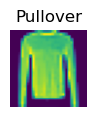

In [161]:
# single images in batch
random_indx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_indx], train_labels_batch[random_indx]
plt.figure(figsize=(1,1))
plt.imshow(img.squeeze())
plt.title(class_names[label])
plt.axis(False)
img.shape

# 2) Building a Model

`Simple Linear Model`

`Simple non-Linear Model`

`CNN Model`



## 1) Build a Linear Model

In [162]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [163]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape, train_features_batch.shape

# flaten the sample
opt = flatten_model(x)
opt.squeeze().shape

torch.Size([784])

In [164]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layerStack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layerStack(x)



In [165]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=28*28, hidden_units=16, output_shape=len(class_names))
model_0

FashionMNISTModelV0(
  (layerStack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [166]:
dummy_x = torch.rand([32,1,28,28])
# model_0(dummy_x).shape # 10 logists values

In [167]:
dict(model_0.state_dict()).keys()

dict_keys(['layerStack.1.weight', 'layerStack.1.bias', 'layerStack.2.weight', 'layerStack.2.bias'])

In [168]:
dictModel = dict(model_0.state_dict())
for key in dict(model_0.state_dict()):
    print(key, " => ", dictModel[key].shape)

layerStack.1.weight  =>  torch.Size([16, 784])
layerStack.1.bias  =>  torch.Size([16])
layerStack.2.weight  =>  torch.Size([10, 16])
layerStack.2.bias  =>  torch.Size([10])


### 4) Setup loss function, optimzer and evalutation metrics

* Loss function multiclass classifcation `nn.CrossEntorpyLoss()`
* optimizer - `torch.optim.SGD()`
* evaluation metrics - multiclass classification so use accuracy `torchmetrics.Accuracy()`

In [169]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [170]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.1)

### 5) Creating a function to time our experiments

* model performance (loss and accuracy values)
* how fast is run

In [171]:
from timeit import default_timer as Timer
from typing import Optional
import torch

def print_train_time(start: float, end: float, device: Optional[torch.device] = None) -> float:
    """Prints and returns the total training time."""
    total_time = end - start
    device_str = device if device else "Unknown Device"
    print(f"Train time on {device_str}: {total_time:.3f} seconds")
    return total_time  # Returning allows for further use


In [172]:
start = Timer()
# Training process here...
end = Timer()

train_time = print_train_time(start, end, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))


Train time on cpu: 0.000 seconds


In [173]:
from tqdm.auto import tqdm

train_time_start  = Timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}")
    train_loss = 0
    # Add a traiuning loop through bathces
    for batch , (img, label) in enumerate(train_dataloader):
        model_0.train()
        # forward pass
        y_pred = model_0(img)
        # calculate theloss
        loss = loss_fn(y_pred, label)
        train_loss += loss
        # optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(img)}/{len(train_dataloader.dataset)} samples")
    # print(dict(enumerate(train_dataloader)))
    # devide total train loss by the length of the data loader
    train_loss /= len(train_dataloader)

    # testing loop
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for img_test, label_test in test_dataloader:
            test_pred = model_0(img_test)
            test_loss += loss_fn(test_pred, label_test)
            test_acc += accuracy_fn(y_true=label_test, y_pred=test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"Train Loss : {train_loss:.4f} Test Loss : {test_loss:.4f}, Test Accuracy : {test_acc:.4f}")

train_time_end = Timer()

print_train_time(train_time_start, train_time_end)    

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss : 0.5840 Test Loss : 0.4864, Test Accuracy : 82.8275
Epoch : 1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss : 0.4748 Test Loss : 0.5027, Test Accuracy : 81.8690
Epoch : 2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss : 0.4532 Test Loss : 0.4753, Test Accuracy : 83.1070
Train time on Unknown Device: 23.138 seconds


23.138209199998528

### 6) Making pridications and get model 0 Results

In [174]:
torch.manual_seed(42)

def eval_model(model, data_loader, loss_fn, accuracy_fn):
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss+=loss_fn(y_pred, y)
            acc+=accuracy_fn(y, y_pred.argmax(dim=1))
        # scale loss and acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name" : model.__class__.__name__, "model_loss":loss.item(), "model_acc" : acc}

In [175]:
eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4753176271915436,
 'model_acc': 83.1070287539936}

In [176]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


## 2) Building Model with non linearity

`nn.ReLU()`

In [177]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_Shape, hidden_unit, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_Shape, hidden_unit),
            nn.ReLU(),
            nn.Linear(hidden_unit, output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [178]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(28*28, 16, len(class_names))
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 8) Setup loss function and optimzers and accuracy

In [179]:
loss_fn_1 = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr = 0.01)
accuracy_fn

<function __main__.accuracy_fn(y_true, y_pred)>

In [180]:
epochs = 3
train_loss = 0
train_acc = 0
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch} / {epochs}")
    model_1.train()
    for batch, (img, label) in enumerate(train_dataloader):
        y_pred = model_1(img)
        loss = loss_fn_1(y_pred, label)
        train_loss += loss
        train_acc += accuracy_fn(label, y_pred.argmax(dim=1))
        optimizer_1.zero_grad()
        loss.backward()
        optimizer_1.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(img)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 / 3
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 1.48584 | Train acc: 54.35%
Epoch : 1 / 3
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 1.07341 | Train acc: 66.91%
Epoch : 2 / 3
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.96628 | Train acc: 68.74%


In [181]:
# Setup device-agnostic code
import torch 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [182]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device 
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)
    
    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()
    if batch % 400 == 0:
            print(f"Looked at {batch * len(img)}/{len(train_dataloader.dataset)} samples")
  
  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [183]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0
  
  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculuate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels 

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [184]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn_1,
             optimizer=optimizer_1,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn_1,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.91806 | Train acc: 69.45%
Test loss: 0.92539 | Test acc: 68.99%

Epoch: 1
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.89349 | Train acc: 69.72%
Test loss: 0.90868 | Test acc: 69.06%

Epoch: 2
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.87872 | Train acc: 69.94%
Test loss: 0.89954 | Test acc: 69.23%

Train time on cpu: 23.758 seconds


In [185]:
# Get model_1 results dictionary
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4753176271915436,
 'model_acc': 83.1070287539936}

In [186]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn_1,
                             accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8995388746261597,
 'model_acc': 69.22923322683707}

## 3) Bulding Model with CNN

`VGG` pupular CNN Architechture

`block` consists of multple layers

`Architecutre` consist of multiple block

In [331]:
class FashionMNISTConv(nn.Module):
    def __init__(self, input_shape, hidden_unit, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_unit, kernel_size=3, stride=1, padding=1), # values we can set in nn are called hyper parameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit, out_channels=hidden_unit, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_unit, out_channels=hidden_unit, kernel_size=3, stride=1, padding=1), # values we can set in nn are called hyper parameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit, out_channels=hidden_unit, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.output_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_unit * 7 * 7, out_features=output_shape)
        )

    def forward(self, x):
        # print("First iomage shape", x.shape)
        x = self.conv_block_1(x)
        # print("After first conv block", x.shape)
        x = self.conv_block_2(x)
        # print("After second conv block", x.shape)
        x = self.output_layer(x)
        # print("After output block", x.shape)

        return x


#### 0) Model Summary

In [332]:
# # %pip install torchinfo

# from torchinfo import summary

# # Example model
# model_conv = FashionMNISTConv(input_shape=1, hidden_unit = 10, output_shape=len(class_names))

# # Print model summary
# summary(model_conv, input_size=(1,28, 28))  # (batch_size, channels, height, width)


In [333]:
# import torch

# x = torch.randn( 1, 28, 28)  # Test input
# try:
#     output = model_conv(x)
#     print("Model output shape:", output.shape)
# except Exception as e:
#     print("Error during forward pass:", e)


In [334]:
# # create a batch of data 
# torch.manual_seed(42)
# batch_image = torch.randn(size=(32,3,64,64))
# image = batch_image[0]
# # plt.imshow(image) # int take (H,W,C)
# image = image.permute(1, 2, 0)
# # image = (image - image.min()) / (image.max() - image.min())
# plt.imshow(image)
# plt.axis("off")  # Hide axes
# plt.show()


#### 1) Conv2D / 2) MaxPool2d

`nn.Conv2d(in_channels, out_channels, kernel, stride, padding)`

In [335]:
batch_image = torch.randn(size=(32,3,64,64))
batch_image.shape
test_image = batch_image[0]
test_image.shape

torch.Size([3, 64, 64])

In [336]:
# import torch
# import torch.nn as nn
# import matplotlib.pyplot as plt

# # Create a sample test image (Batch Size = 1, Channels = 3, Height = 64, Width = 64)
# test_image = torch.randn(size=(1, 3, 64, 64))

# # Define Convolutional Layer
# conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(3,3), stride=2, padding=1)

# # Pass image through Conv layer
# conv_output = conv_layer(test_image)  # Shape: (1, 10, 32, 32)

# # Select one of the 10 channels to visualize (e.g., first channel)
# image = conv_output[0, 0].detach().numpy()  # Shape: (32, 32)

# # Normalize for visualization
# image = (image - image.min()) / (image.max() - image.min())

# # Display the image
# plt.imshow(image, cmap="gray")  # Use grayscale for single-channel images
# plt.axis("off")  # Hide axes
# plt.show()


In [337]:
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(5,5), stride=2, padding=0)
print(conv_layer(test_image).shape)
# # image = (image - image.min()) / (image.max() - image.min())
# image = conv_layer(test_image)[0,0].detach().numpy()  # Shape: (32, 32)
# plt.imshow(image)
# plt.axis("off")  # Hide axes
# plt.show()

torch.Size([10, 30, 30])


`nn.MaxPool2d()`

In [338]:
test_image.shape

torch.Size([3, 64, 64])

In [339]:
layer = nn.MaxPool2d(kernel_size=2)
layer(test_image).shape

torch.Size([3, 32, 32])

#### Start Using layers

In [340]:
print("Batch image " ,batch_image.shape)
image = batch_image[0]
print("Single Image ", image.shape)

Batch image  torch.Size([32, 3, 64, 64])
Single Image  torch.Size([3, 64, 64])


In [341]:
# model_conv = FashionMNISTConv(input_shape=3, hidden_unit=6, output_shape=len(class_names))
# model_conv

In [342]:
# output = model_conv(batch_image)

In [343]:
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [363]:
model_conv = FashionMNISTConv(input_shape=1, hidden_unit=16, output_shape=len(class_names))
model_conv(img).shape

torch.Size([32, 10])

In [364]:
from torchinfo import summary
summary(model_conv, input_size=(32,1,28, 28))  # (batch_size, channels, height, width)

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTConv                         [32, 10]                  --
├─Sequential: 1-1                        [32, 16, 14, 14]          --
│    └─Conv2d: 2-1                       [32, 16, 28, 28]          160
│    └─ReLU: 2-2                         [32, 16, 28, 28]          --
│    └─Conv2d: 2-3                       [32, 16, 28, 28]          2,320
│    └─ReLU: 2-4                         [32, 16, 28, 28]          --
│    └─MaxPool2d: 2-5                    [32, 16, 14, 14]          --
├─Sequential: 1-2                        [32, 16, 7, 7]            --
│    └─Conv2d: 2-6                       [32, 16, 14, 14]          2,320
│    └─ReLU: 2-7                         [32, 16, 14, 14]          --
│    └─Conv2d: 2-8                       [32, 16, 14, 14]          2,320
│    └─ReLU: 2-9                         [32, 16, 14, 14]          --
│    └─MaxPool2d: 2-10                   [32, 16, 7, 7]            --
├─Seq

#### 3) Setup loss function and optimizer

In [365]:
# accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optmizer = torch.optim.SGD(model_conv.parameters(), lr = 0.01)

#### 4) Training and Testing loop

In [366]:
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs = 3
for i in tqdm(range(epochs)):
    print("---")
    train_step(model_conv, train_dataloader, loss_fn, optmizer, accuracy_fn)
    test_step(model_conv, test_dataloader, loss_fn, accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 1.39190 | Train acc: 48.78%
Test loss: 0.63054 | Test acc: 76.88%

---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.54157 | Train acc: 80.14%
Test loss: 0.48070 | Test acc: 82.32%

---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.43471 | Train acc: 84.28%
Test loss: 0.42567 | Test acc: 84.75%



## 4) Draw Confusion MAtrix

In [ ]:
import mlxtend